# COMP 579 Assignment 1

1. Do Not Change the Random Seed
The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to 
plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.

In [6]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [3]:

class GaussianBandit:
  """
    A class representing a Gaussian multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    mean : list or np.ndarray
        List of mean rewards for each arm.
    variance : float
        Variance of the rewards for all arms.

    Methods
    -------
    sample(arm_index)
        Samples a reward from the specified arm based on a Gaussian distribution.
    """

  def __init__(self, num_arms, mean, variance):
    self.num_arms = num_arms
    self.mean = mean
    self.variance = variance

  def sample(self, arm_index):
    return np.random.normal(self.mean[arm_index], self.variance)
 

In [7]:
# . [5 points] Write a small simulator for a Gaussian bandit with k arms. The mean reward µi for each
# arm i ∈ {1, . . . , k} should be provided as an input, and assume a fixed variance σ
# 2
# for all arms.
# The bandit should have a function called sample which takes as input the index of an action and
# provides a reward sample. Recall that a Gaussian bandit outputs rewards drawn from a normal
# distribution N (µi
# , σ2
# ) for the selected arm.
# Test your code with 3 arms of parameters µ∗ = [0.5, 0.5 − δ, 0.5 + δ], with δ = 0.2 and σ
# 2 = 0.01.
# Generate and save a set of 50 samples for each action. For the test, plot one graph for each action,
# containing the reward values obtained over the 50 draws, the empirical mean of the values, and
# the true µ∗ for each arm. Each graph will have an x-axis that goes to 50, two horizontal lines (true
# value and estimated value), and the set of reward values obtained from the samples.

# TODO:
delta = 0.2
num_arms = 3
means = [0.5, 0.5 - delta, 0.5 + delta] 
variance = 0.01 
num_samples = 50 

three_arm_gaussian_bandit = GaussianBandit(num_arms, means, variance)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    # Store 50 samples per action
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    action_rewards.append(rewards)


### Graphs

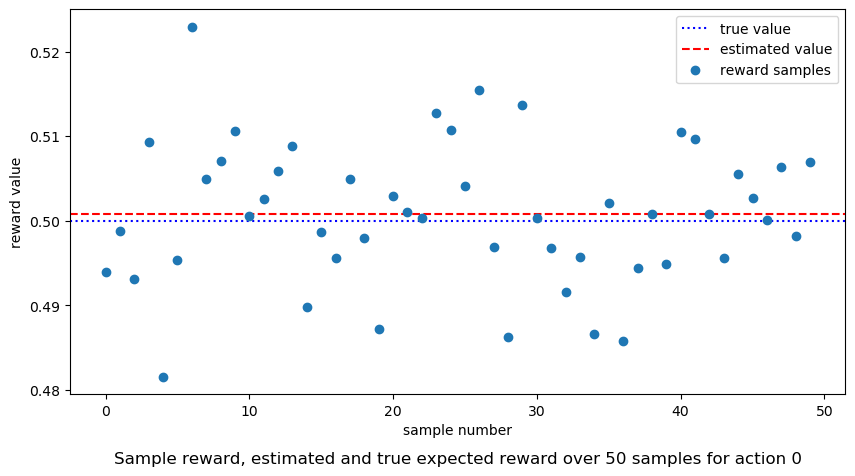

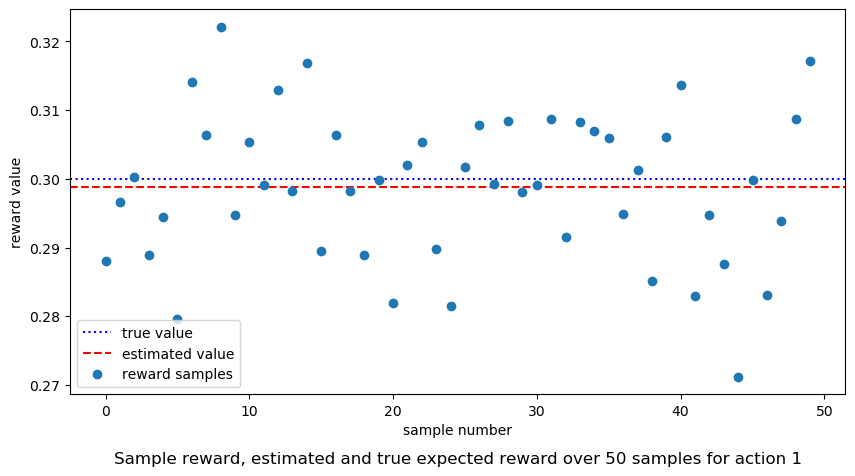

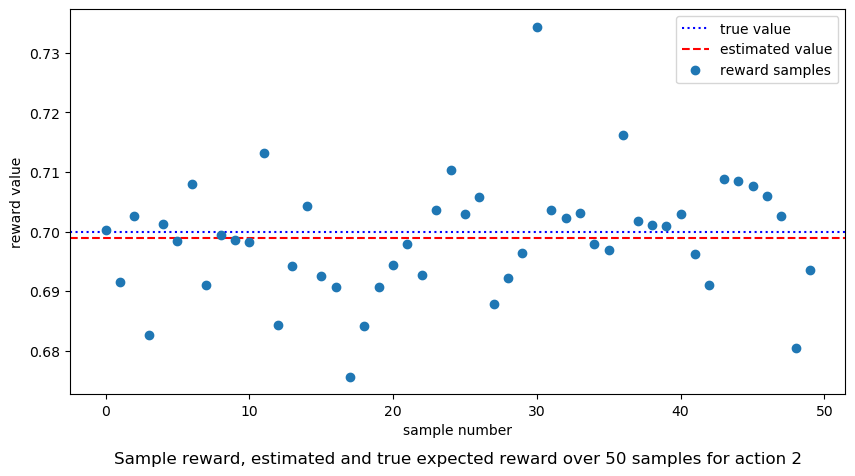

In [5]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  true_value = means[action]
  estimated_value = np.mean(action_rewards[action])

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [6]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """

  q_value = 0
  for i, reward in enumerate(reward_samples):
    q_value = q_value + alpha * (reward - q_value)
    yield q_value

def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
    
  q_value = 0
  for i, reward in enumerate(reward_samples):
    q_value += (reward - q_value) / (i + 1)
    yield q_value
    
def updateDecaying(reward_samples, alpha_0=0.5, lambda_=0.01, p=0.5):
    """
    Each call to the function yields the updated estimate of the action value using an
    improved decaying learning rate.

    Parameters
    ----------
    reward_samples : array-like of int or float
        Samples of reward values from one arm of a bandit.
    alpha_0 : float, optional
        The initial learning rate (default is 0.5).
    lambda_ : float, optional
        The decay rate constant (default is 0.01).
    p : float, optional
        The power parameter for controlling decay (default is 0.5).
    """
    q_value = 0
    for t, reward in enumerate(reward_samples):
        alpha_t = alpha_0 / ((1 + lambda_ * t) ** p)
        q_value += alpha_t * (reward - q_value)
        yield q_value


### Graphs

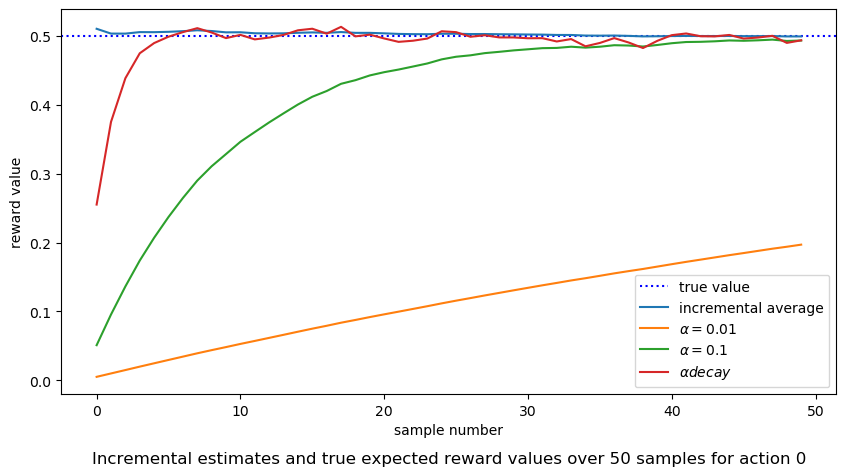

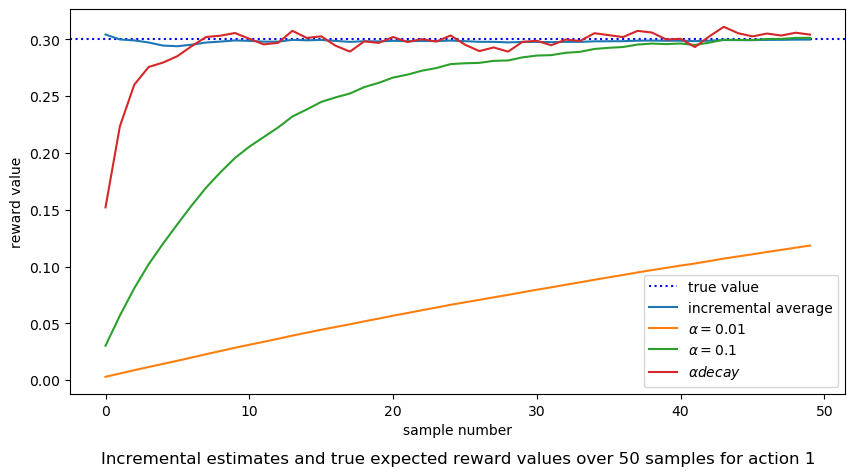

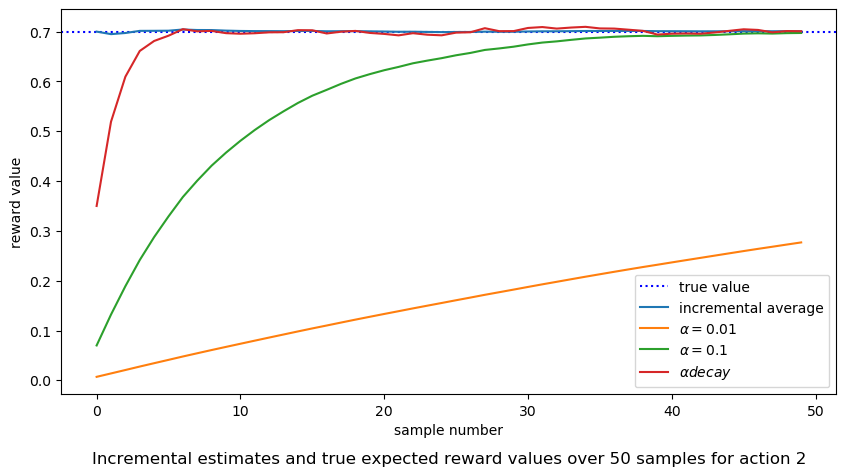

In [8]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
  incr_avgs = list(updateAvg(rewards))
  alpha_1_percent = list(update(rewards, 0.01))
  alpha_10_percent = list(update(rewards, 0.1)) 
  alpha_decay = list(updateDecaying(rewards, alpha_0=0.5, lambda_=0.01, p=0.5))
  true_value = means[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")
  plt_alpha_decay, = ax.plot(alpha_decay, label = r"$\alpha decay$")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

## Q3 Effect of $α$ on Estimated Q values

In [11]:
# TODO:
num_samples = 100

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []
alpha_decay_runs = []


# TODO:
for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []
  sample_alpha_decay_by_actions = []

  for action in actions:
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    sample_incr_avgs_by_actions.append(list(updateAvg(rewards)))
    sample_alpha_1_percent_by_actions.append(list(update(rewards, alpha=0.01)))
    sample_alpha_10_percent_by_actions.append(list(update(rewards, alpha=0.1)))
    sample_alpha_decay_by_actions.append(list(updateDecaying(rewards, alpha_0=0.5, lambda_=0.01, p=0.5)))

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)
  alpha_decay_runs.append(sample_alpha_decay_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)
alpha_decay_runs = np.asarray(alpha_decay_runs)

### Graphs

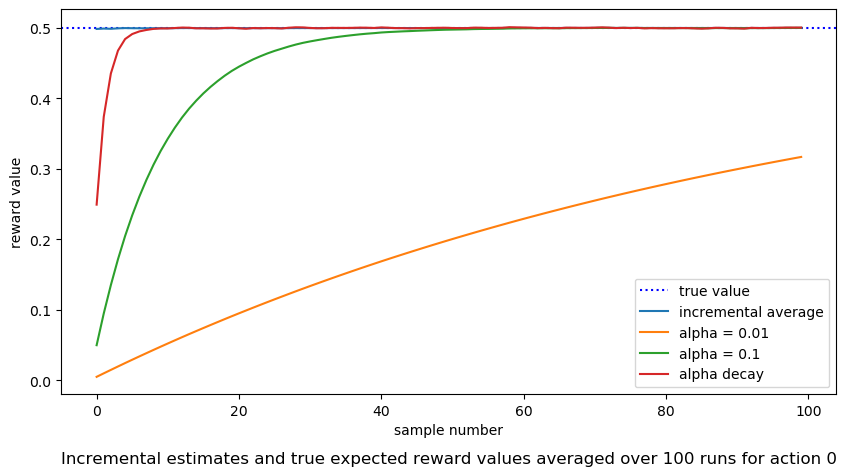

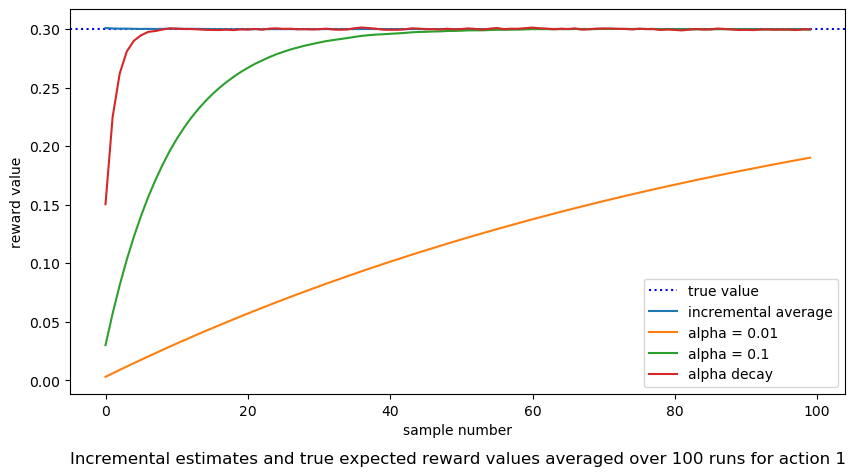

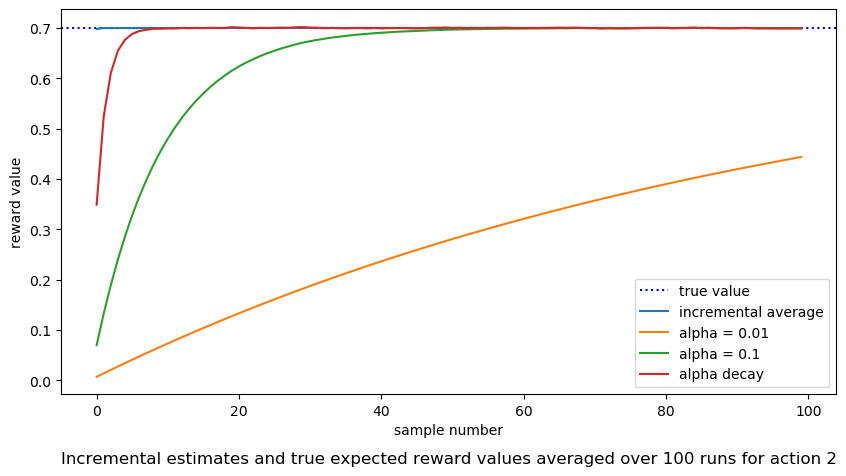

In [12]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  # TODO:
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:, action, :], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:, action, :], axis=0)
  mean_alpha_10_percent_by_actions = np.mean(alpha_10_percent_runs[:, action, :], axis=0)
  mean_alpha_decay_by_actions = np.mean(alpha_decay_runs[:, action, :], axis=0)

  true_value = means[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:, action, :], axis=0)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:, action, :], axis=0)
  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:, action, :], axis=0)
  std_alpha_decay_by_actions = np.std(alpha_decay_runs[:, action, :], axis=0)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_err_incr_avgs_by_actions = std_incr_avgs_by_actions / np.sqrt(100)
  std_err_alpha_1_percent_by_actions = std_alpha_1_percent_by_actions / np.sqrt(100)
  std_err_alpha_10_percent_by_actions = std_alpha_10_percent_by_actions / np.sqrt(100)
  std_err_alpha_decay_by_actions = std_alpha_decay_by_actions / np.sqrt(100) 
  
  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)
  
  plt_alpha_decay, = ax.plot(mean_alpha_decay_by_actions, label = "alpha decay")
  alpha_decay_minus_std_err = mean_alpha_decay_by_actions - std_err_alpha_decay_by_actions
  alpha_decay_plus_std_err = mean_alpha_decay_by_actions + std_err_alpha_decay_by_actions
  ax.fill_between(range(0,100), alpha_decay_minus_std_err, alpha_decay_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

### Answers


## Q4 Epsilon-greedy

In [14]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
    """Epsilon greedy algorithm for bandit action selection

    Parameters
    ----------
    bandit : bandit class
        A bernoulli bandit attributes num_arms and probs_arr, and method sample
    epsilon: float
        A parameter which determines the probability for a random action to be selected
    alpha: (optional) float
        A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
        Default is none, corresponding to incremental averaging.

    Returns
    -------
    R_over_t
        a list of instantaneous return over the time steps
    total_R_over_t
        a list of cummulative reward over the time steps
    est_is_best_over_t
        a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
    l_over_t
        a list of instanteneous regret over the time steps
    total_l_over_t
        a list of cummulative regret over the time steps
    """
    # TODO:
    num_arms = bandit.num_arms

    Q_arr = np.zeros(num_arms)  # Action value estimates
    N_arr = np.zeros(num_arms)  # Number of times each action was selected
    total_R = 0  # Cumulative reward
    total_l = 0  # Cumulative regret
    actions = list(range(num_arms))

    opt_value = max(bandit.mean)  # Optimal action value
    best_action = np.argmax(bandit.mean)  # Index of the optimal action

    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    epsilon_t = epsilon  # Initialize epsilon

    for time_step in range(num_time_step):
        if epsilon_decay:
            epsilon_t = epsilon / (1 + lambda_ * time_step)

        if np.random.rand() < epsilon_t:
            A = np.random.choice(actions)  # Random action
        else:
            max_value = np.max(Q_arr)
            max_actions = [a for a in actions if Q_arr[a] == max_value]
            A = np.random.choice(max_actions)  # Break ties randomly

        curr_R = bandit.sample(A)  # Reward from the selected action
        N_arr[A] += 1

        if alpha is None:
            # Incremental averaging
            Q_arr[A] += (curr_R - Q_arr[A]) / N_arr[A]
        else:
            # Fixed learning rate
            Q_arr[A] += alpha * (curr_R - Q_arr[A])

        R_over_t.append(curr_R)

        total_R += curr_R
        total_R_over_t.append(total_R)

        est_is_best = 1 if np.argmax(Q_arr) == best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - curr_R
        l_over_t.append(l_t)

        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t


### Graphs

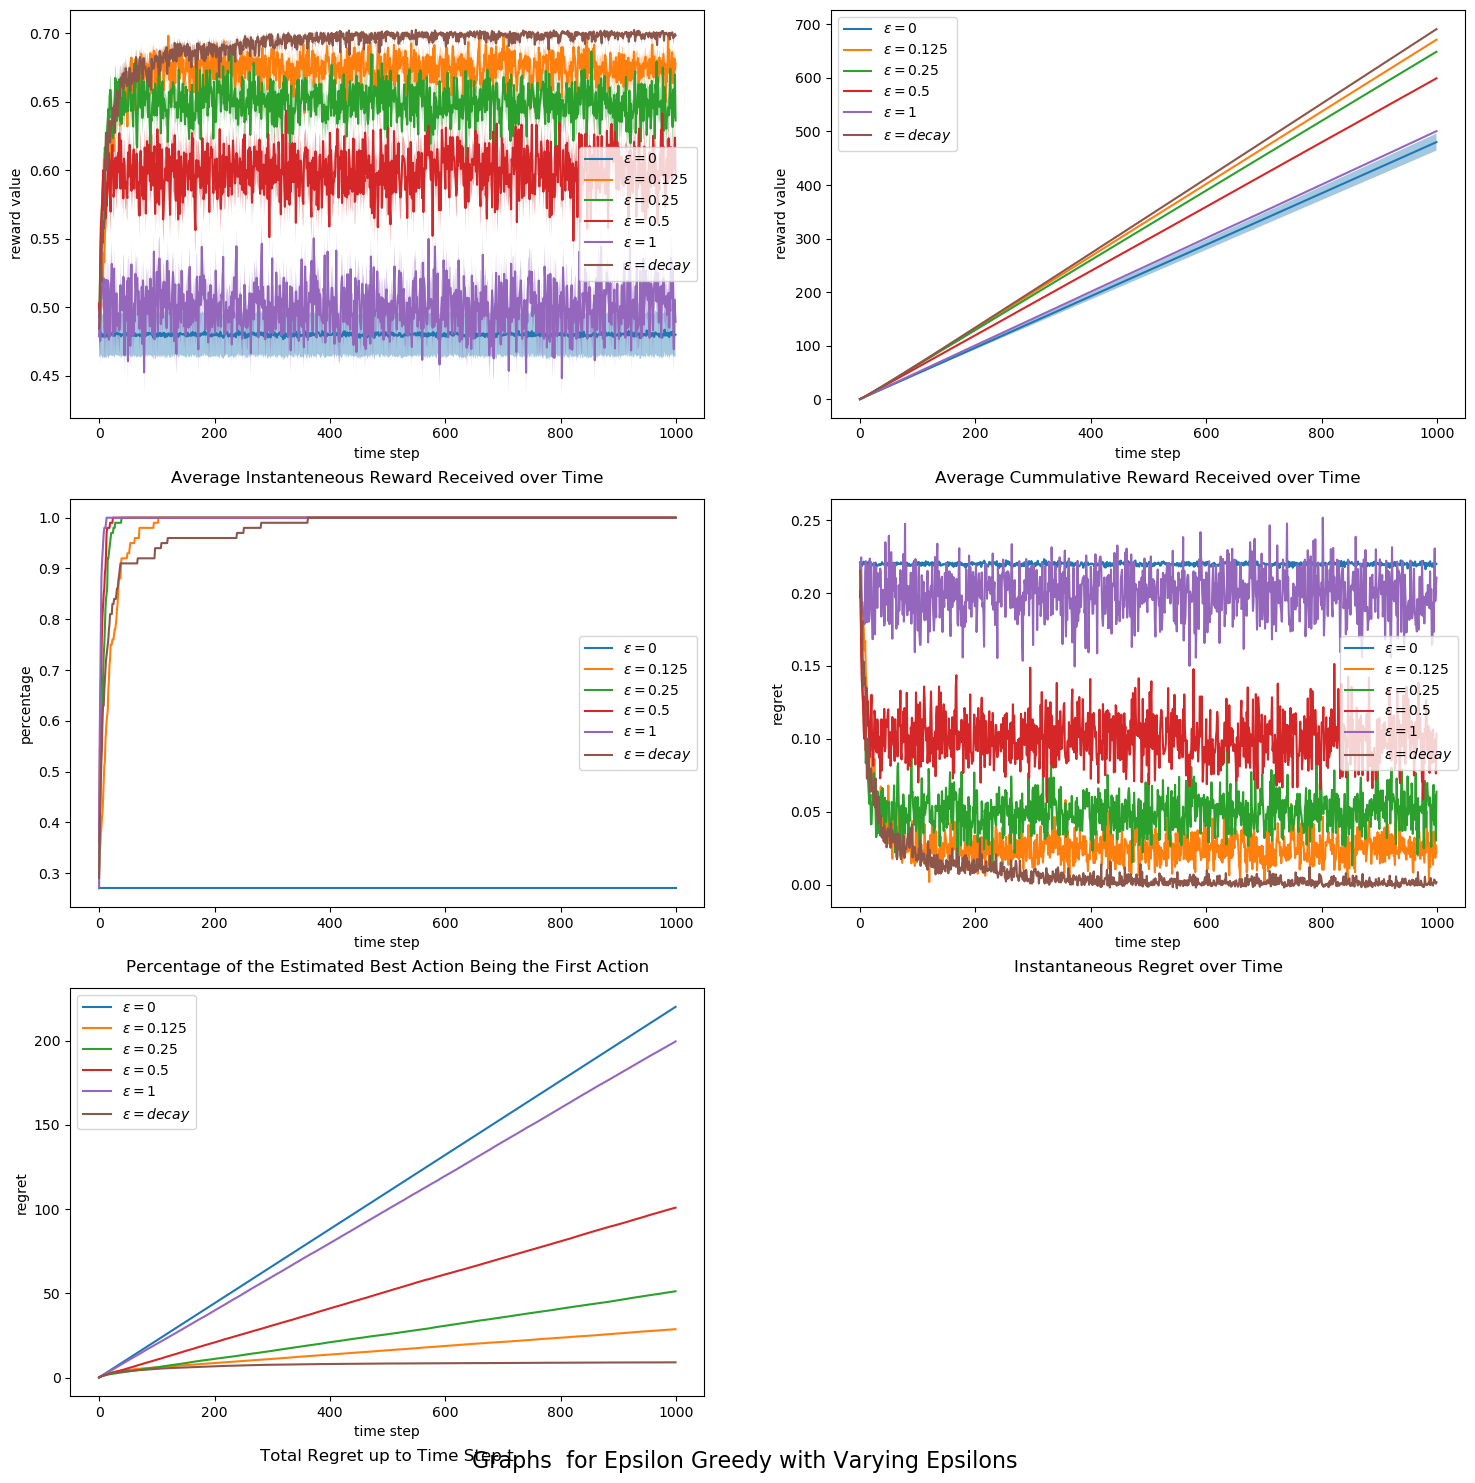

In [16]:
#TODO:
epsilons = [0, 1/8, 1/4, 1/2, 1]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1} # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          decaying_epsilon_params['epsilon_0'], 
          epsilon_decay=True, 
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs  for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

Higher epsilon values encourage exploration, leading to better discovery of the optimal action but higher initial regret, while lower epsilon values focus on exploitation, risking suboptimal choices. Decaying epsilon balances exploration and exploitation, achieving lower regret over time, and generally performs better than fixed epsilon values. An optimal fixed epsilon typically lies between 0.1 and 0.25.


## Q5 Hyperparameters for Epsilon-greedy

To have a plain start, you have been provided with predefined functions for generating plots until now. However, moving forward, you are expected to plot graphs on your own.

### Graphs

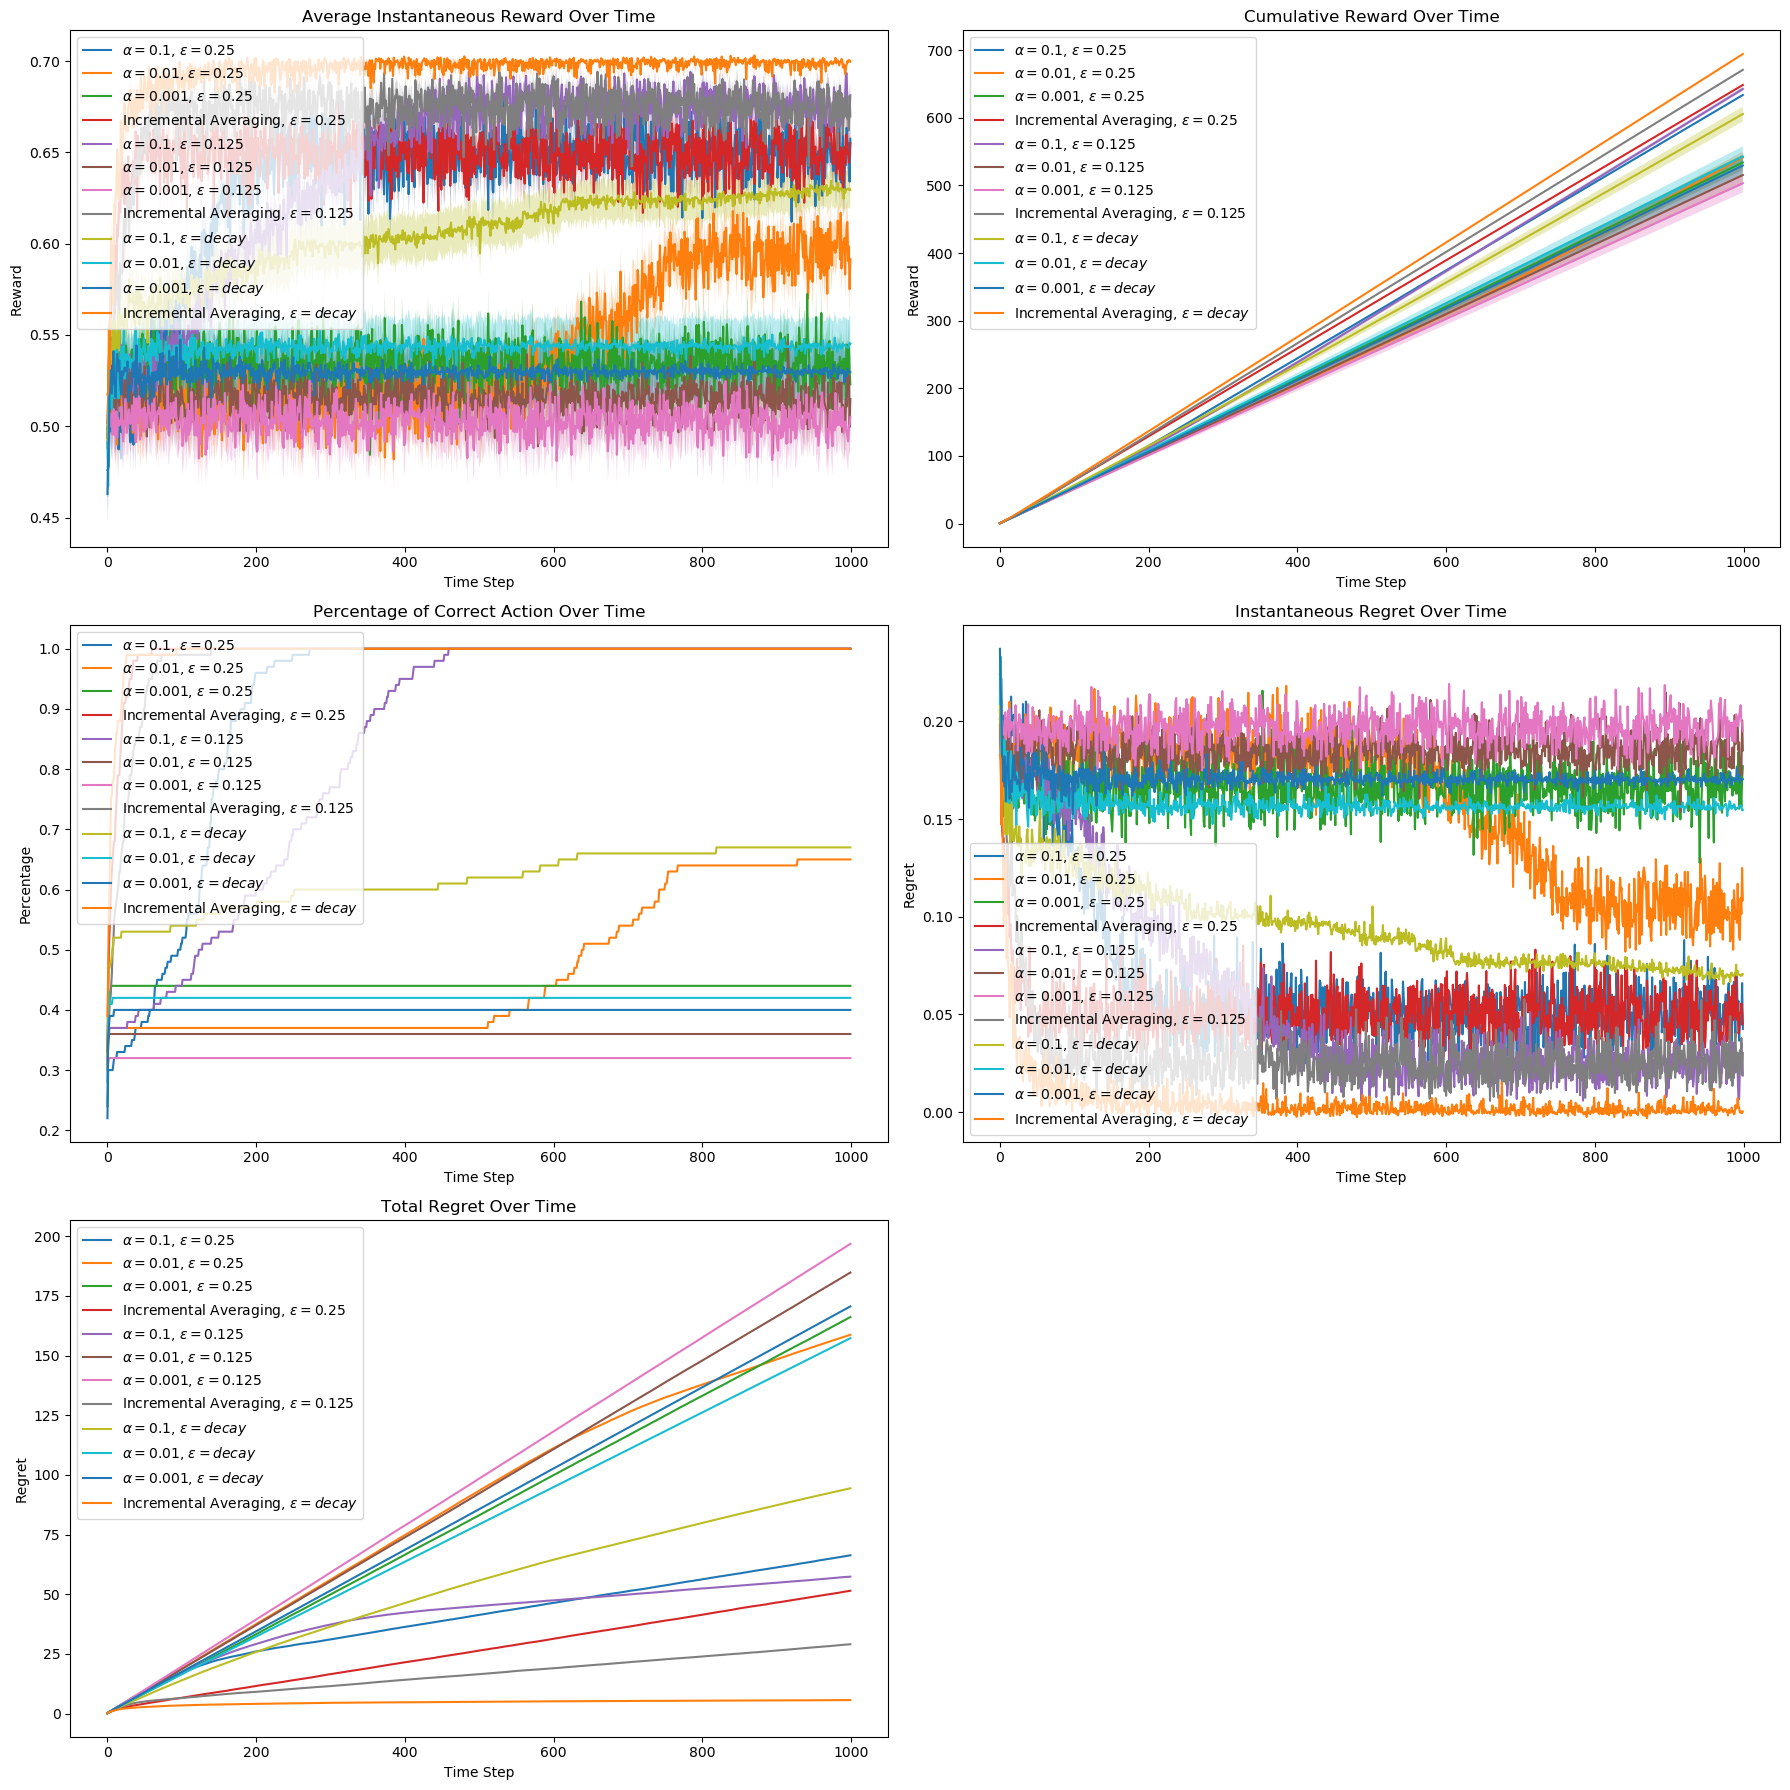

In [17]:
alphas = [0.1, 0.01, 0.001, None]  # None represents incremental averaging
epsilons = [1/4, 1/8, "decay"]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons:
    for alpha in alphas:
        # Arrays for storing data over 100 runs
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        for run in range(100):
            if epsilon == "decay":
                R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                    three_arm_gaussian_bandit,
                    decaying_epsilon_params['epsilon_0'],
                    alpha=alpha,
                    epsilon_decay=True,
                    lambda_=decaying_epsilon_params['lambda_']
                )
            else:
                R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                    three_arm_gaussian_bandit,
                    epsilon,
                    alpha=alpha
                )
            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)
            est_is_best_over_t_runs.append(est_is_best_over_t)
            l_over_t_runs.append(l_over_t)
            total_l_over_t_runs.append(total_l_over_t)

        # Convert lists to numpy arrays
        R_over_t_runs = np.asarray(R_over_t_runs)
        total_R_over_t_runs = np.asarray(total_R_over_t_runs)
        est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
        l_over_t_runs = np.asarray(l_over_t_runs)
        total_l_over_t_runs = np.asarray(total_l_over_t_runs)

        # Plot mean reward over time
        mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
        std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(R_over_t_runs.shape[0])

        label_alpha = f"$\\alpha = {alpha}$" if alpha is not None else "Incremental Averaging"
        axs[0, 0].plot(mean_R_over_t_runs, label=f"{label_alpha}, $\\epsilon = {epsilon}$")
        axs[0, 0].fill_between(range(1000), mean_R_over_t_runs - std_err_R_over_t_runs, mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.3)

        # Plot cumulative reward over time
        mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
        std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(total_R_over_t_runs.shape[0])

        axs[0, 1].plot(mean_total_R_over_t_runs, label=f"{label_alpha}, $\\epsilon = {epsilon}$")
        axs[0, 1].fill_between(range(1000), mean_total_R_over_t_runs - std_err_total_R_over_t_runs, mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.3)

        # Plot percentage of correct action over time
        est_is_best_over_t_avg = np.mean(est_is_best_over_t_runs, axis=0)
        axs[1, 0].plot(est_is_best_over_t_avg, label=f"{label_alpha}, $\\epsilon = {epsilon}$")

        # Plot instantaneous regret over time
        mean_l_over_t_runs = np.mean(l_over_t_runs, axis=0)
        axs[1, 1].plot(mean_l_over_t_runs, label=f"{label_alpha}, $\\epsilon = {epsilon}$")

        # Plot total regret over time
        mean_total_l_over_t_runs = np.mean(total_l_over_t_runs, axis=0)
        axs[2, 0].plot(mean_total_l_over_t_runs, label=f"{label_alpha}, $\\epsilon = {epsilon}$")

# Configure subplots
axs[0, 0].legend()
axs[0, 0].set_title("Average Instantaneous Reward Over Time")
axs[0, 0].set_xlabel("Time Step")
axs[0, 0].set_ylabel("Reward")

axs[0, 1].legend()
axs[0, 1].set_title("Cumulative Reward Over Time")
axs[0, 1].set_xlabel("Time Step")
axs[0, 1].set_ylabel("Reward")

axs[1, 0].legend()
axs[1, 0].set_title("Percentage of Correct Action Over Time")
axs[1, 0].set_xlabel("Time Step")
axs[1, 0].set_ylabel("Percentage")

axs[1, 1].legend()
axs[1, 1].set_title("Instantaneous Regret Over Time")
axs[1, 1].set_xlabel("Time Step")
axs[1, 1].set_ylabel("Regret")

axs[2, 0].legend()
axs[2, 0].set_title("Total Regret Over Time")
axs[2, 0].set_xlabel("Time Step")
axs[2, 0].set_ylabel("Regret")

# Hide unused subplot
axs[2, 1].axis("off")

plt.tight_layout()
plt.show()


### Answers

Effect of Alpha:
Larger α values (α=0.1) lead to faster adaptation to rewards but may overshoot when rewards are noisy.
Smaller α values (α=0.01,α=0.001) adapt slower but are more stable.
Incremental averaging performs well over longer runs, similar to small α.
Epsilon Interaction:
Decaying ϵ balances exploration and exploitation better than fixed ϵ. For fixed ϵ, ϵ=1/8 performs better than ϵ=1/4, reducing regret while maintaining sufficient exploration.

## Q6 Gradient Bandit

In [22]:
def gradient_bandit(
    bandit,
    alpha=0.1,
    num_time_steps=1000,
    alpha_decay=False,   # Added param
    alpha_0=0.5,
    lambda_=0.01,
    p=0.5
):
    """
    Gradient Bandit with optional decaying alpha.
    """
    assert isinstance(alpha, float), "alpha must be a float"
    import numpy as np
    num_arms = bandit.num_arms
    
    # Preferences
    H = np.zeros(num_arms)
    
    # Baseline for average reward
    baseline = 0.0
    
    # Identify true best action
    best_action = np.argmax(bandit.mean)
    best_action_value = np.max(bandit.mean)
    
    # Lists to store metrics
    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    total_reward = 0
    total_regret = 0
    
    for t in range(num_time_steps):
        # Decide which alpha to use at this time step
        if alpha_decay:
            # Decaying alpha: alpha_t = alpha_0 / (1 + lambda_*t)^p
            alpha_t = alpha_0 / (1 + lambda_ * t) ** p
        else:
            alpha_t = alpha

        # Compute action probabilities via softmax of preferences
        exp_H = np.exp(H)
        probs = exp_H / np.sum(exp_H)

        # Choose action
        action = np.random.choice(range(num_arms), p=probs)

        # Sample reward
        reward = bandit.sample(action)

        # Update baseline (incremental average)
        baseline += (reward - baseline) / (t + 1)

        # Update preferences
        try:
            for a in range(num_arms):
                if a == action:
                    H[a] += alpha_t * (reward - baseline) * (1 - probs[a])
                else:
                    H[a] -= alpha_t * (reward - baseline) * probs[a]
        except:
            print("H: ", H[a])
            print("a: ", a)
            print("action: ", action)
            print("probs: ", probs[a])
            print("reward: ", reward)
            print("baseline: ", baseline)
            print("alpha_t: ", alpha_t)
            print("t: ", t)
            raise Exception("Error in updating preferences")

        # Compute metrics
        R_over_t.append(reward)
        total_reward += reward
        total_R_over_t.append(total_reward)

        # Was our best estimated action actually the true best?
        est_is_best = 1 if np.argmax(H) == best_action else 0
        est_is_best_over_t.append(est_is_best)

        instant_regret = best_action_value - reward
        l_over_t.append(instant_regret)
        total_regret += instant_regret
        total_l_over_t.append(total_regret)

    return (R_over_t,
            total_R_over_t,
            est_is_best_over_t,
            l_over_t,
            total_l_over_t)


### Graphs

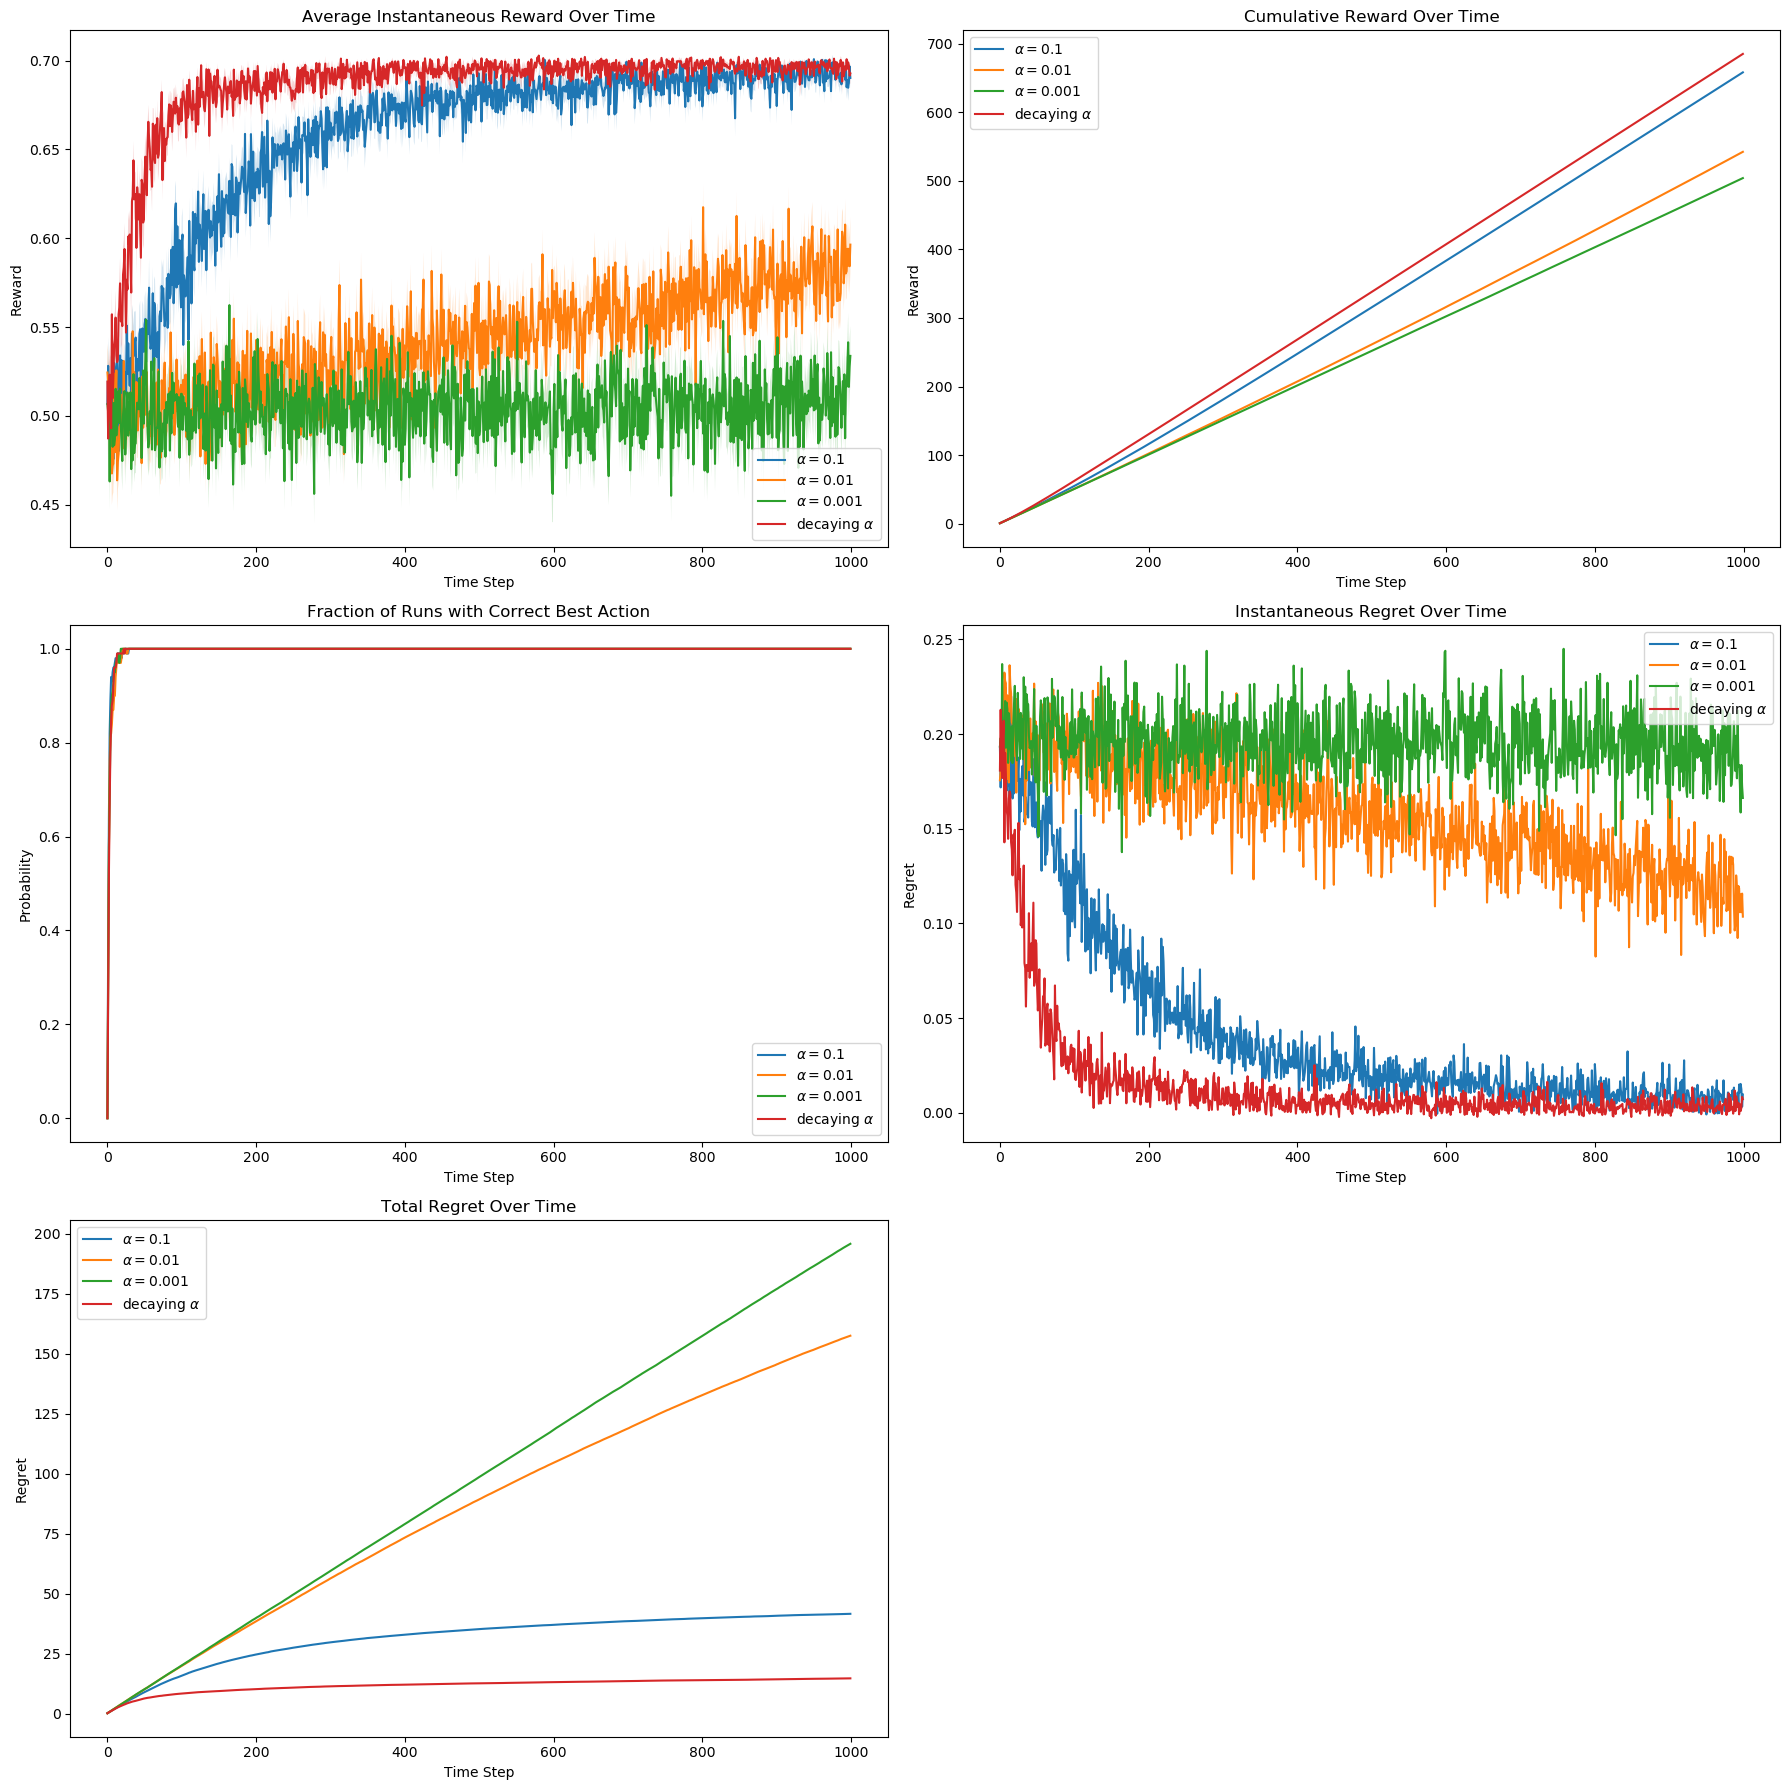

In [30]:
learning_rates = [0.1, 0.01, 0.001, "decay"]

num_runs = 100
num_time_steps = 1000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for alpha_setting in learning_rates:
    if alpha_setting == "decay":
        # Use decaying alpha
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        for run in range(num_runs):
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
                three_arm_gaussian_bandit,
                alpha_decay=True,
                alpha_0=0.5,
                lambda_=0.01,
                p=0.5,
                num_time_steps=num_time_steps
            )
            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)
            est_is_best_over_t_runs.append(est_is_best_over_t)
            l_over_t_runs.append(l_over_t)
            total_l_over_t_runs.append(total_l_over_t)
    else:
        # Use constant alpha
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        for run in range(num_runs):
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
                three_arm_gaussian_bandit,
                alpha=alpha_setting,
                alpha_decay=False,
                num_time_steps=num_time_steps
            )
            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)
            est_is_best_over_t_runs.append(est_is_best_over_t)
            l_over_t_runs.append(l_over_t)
            total_l_over_t_runs.append(total_l_over_t)

    # Convert to numpy arrays for plotting
    R_over_t_runs = np.asarray(R_over_t_runs)
    total_R_over_t_runs = np.asarray(total_R_over_t_runs)
    est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
    l_over_t_runs = np.asarray(l_over_t_runs)
    total_l_over_t_runs = np.asarray(total_l_over_t_runs)

    # Compute averages and standard errors
    mean_R = np.mean(R_over_t_runs, axis=0)
    std_err_R = np.std(R_over_t_runs, axis=0) / np.sqrt(num_runs)

    mean_total_R = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(num_runs)

    mean_est_is_best = np.mean(est_is_best_over_t_runs, axis=0)

    mean_l = np.mean(l_over_t_runs, axis=0)
    mean_total_l = np.mean(total_l_over_t_runs, axis=0)

    # Plot labels
    if alpha_setting == "decay":
        label_str = "decaying $\\alpha$"
    else:
        label_str = f"$\\alpha={alpha_setting}$"

    # 1. Average Instantaneous Reward
    axs[0, 0].plot(mean_R, label=label_str)
    axs[0, 0].fill_between(range(num_time_steps), mean_R - std_err_R, mean_R + std_err_R, alpha=0.2)

    # 2. Average Cumulative Reward
    axs[0, 1].plot(mean_total_R, label=label_str)
    axs[0, 1].fill_between(range(num_time_steps), mean_total_R - std_err_total_R, mean_total_R + std_err_total_R, alpha=0.2)

    # 3. Fraction of Runs That Correctly Identify Best Action
    axs[1, 0].plot(mean_est_is_best, label=label_str)

    # 4. Instantaneous Regret
    axs[1, 1].plot(mean_l, label=label_str)

    # 5. Total Regret
    axs[2, 0].plot(mean_total_l, label=label_str)

# Aesthetics and legends
axs[0, 0].legend()
axs[0, 0].set_title("Average Instantaneous Reward Over Time")
axs[0, 0].set_xlabel("Time Step")
axs[0, 0].set_ylabel("Reward")

axs[0, 1].legend()
axs[0, 1].set_title("Cumulative Reward Over Time")
axs[0, 1].set_xlabel("Time Step")
axs[0, 1].set_ylabel("Reward")

axs[1, 0].legend()
axs[1, 0].set_title("Fraction of Runs with Correct Best Action")
axs[1, 0].set_xlabel("Time Step")
axs[1, 0].set_ylabel("Probability")

axs[1, 1].legend()
axs[1, 1].set_title("Instantaneous Regret Over Time")
axs[1, 1].set_xlabel("Time Step")
axs[1, 1].set_ylabel("Regret")

axs[2, 0].legend()
axs[2, 0].set_title("Total Regret Over Time")
axs[2, 0].set_xlabel("Time Step")
axs[2, 0].set_ylabel("Regret")

# Hide unused subplot
axs[2, 1].axis("off")
plt.tight_layout()
plt.show()

### Answers

The graphs illustrate that a higher learning rate (α=0.1) leads to faster convergence to optimal rewards and lower regret, while smaller learning rates (α=0.001) converge more slowly. The decaying 
α balances exploration and exploitation, resulting in intermediate performance compared to constant high or low learning rates.

## Q7 Thompson Sampling

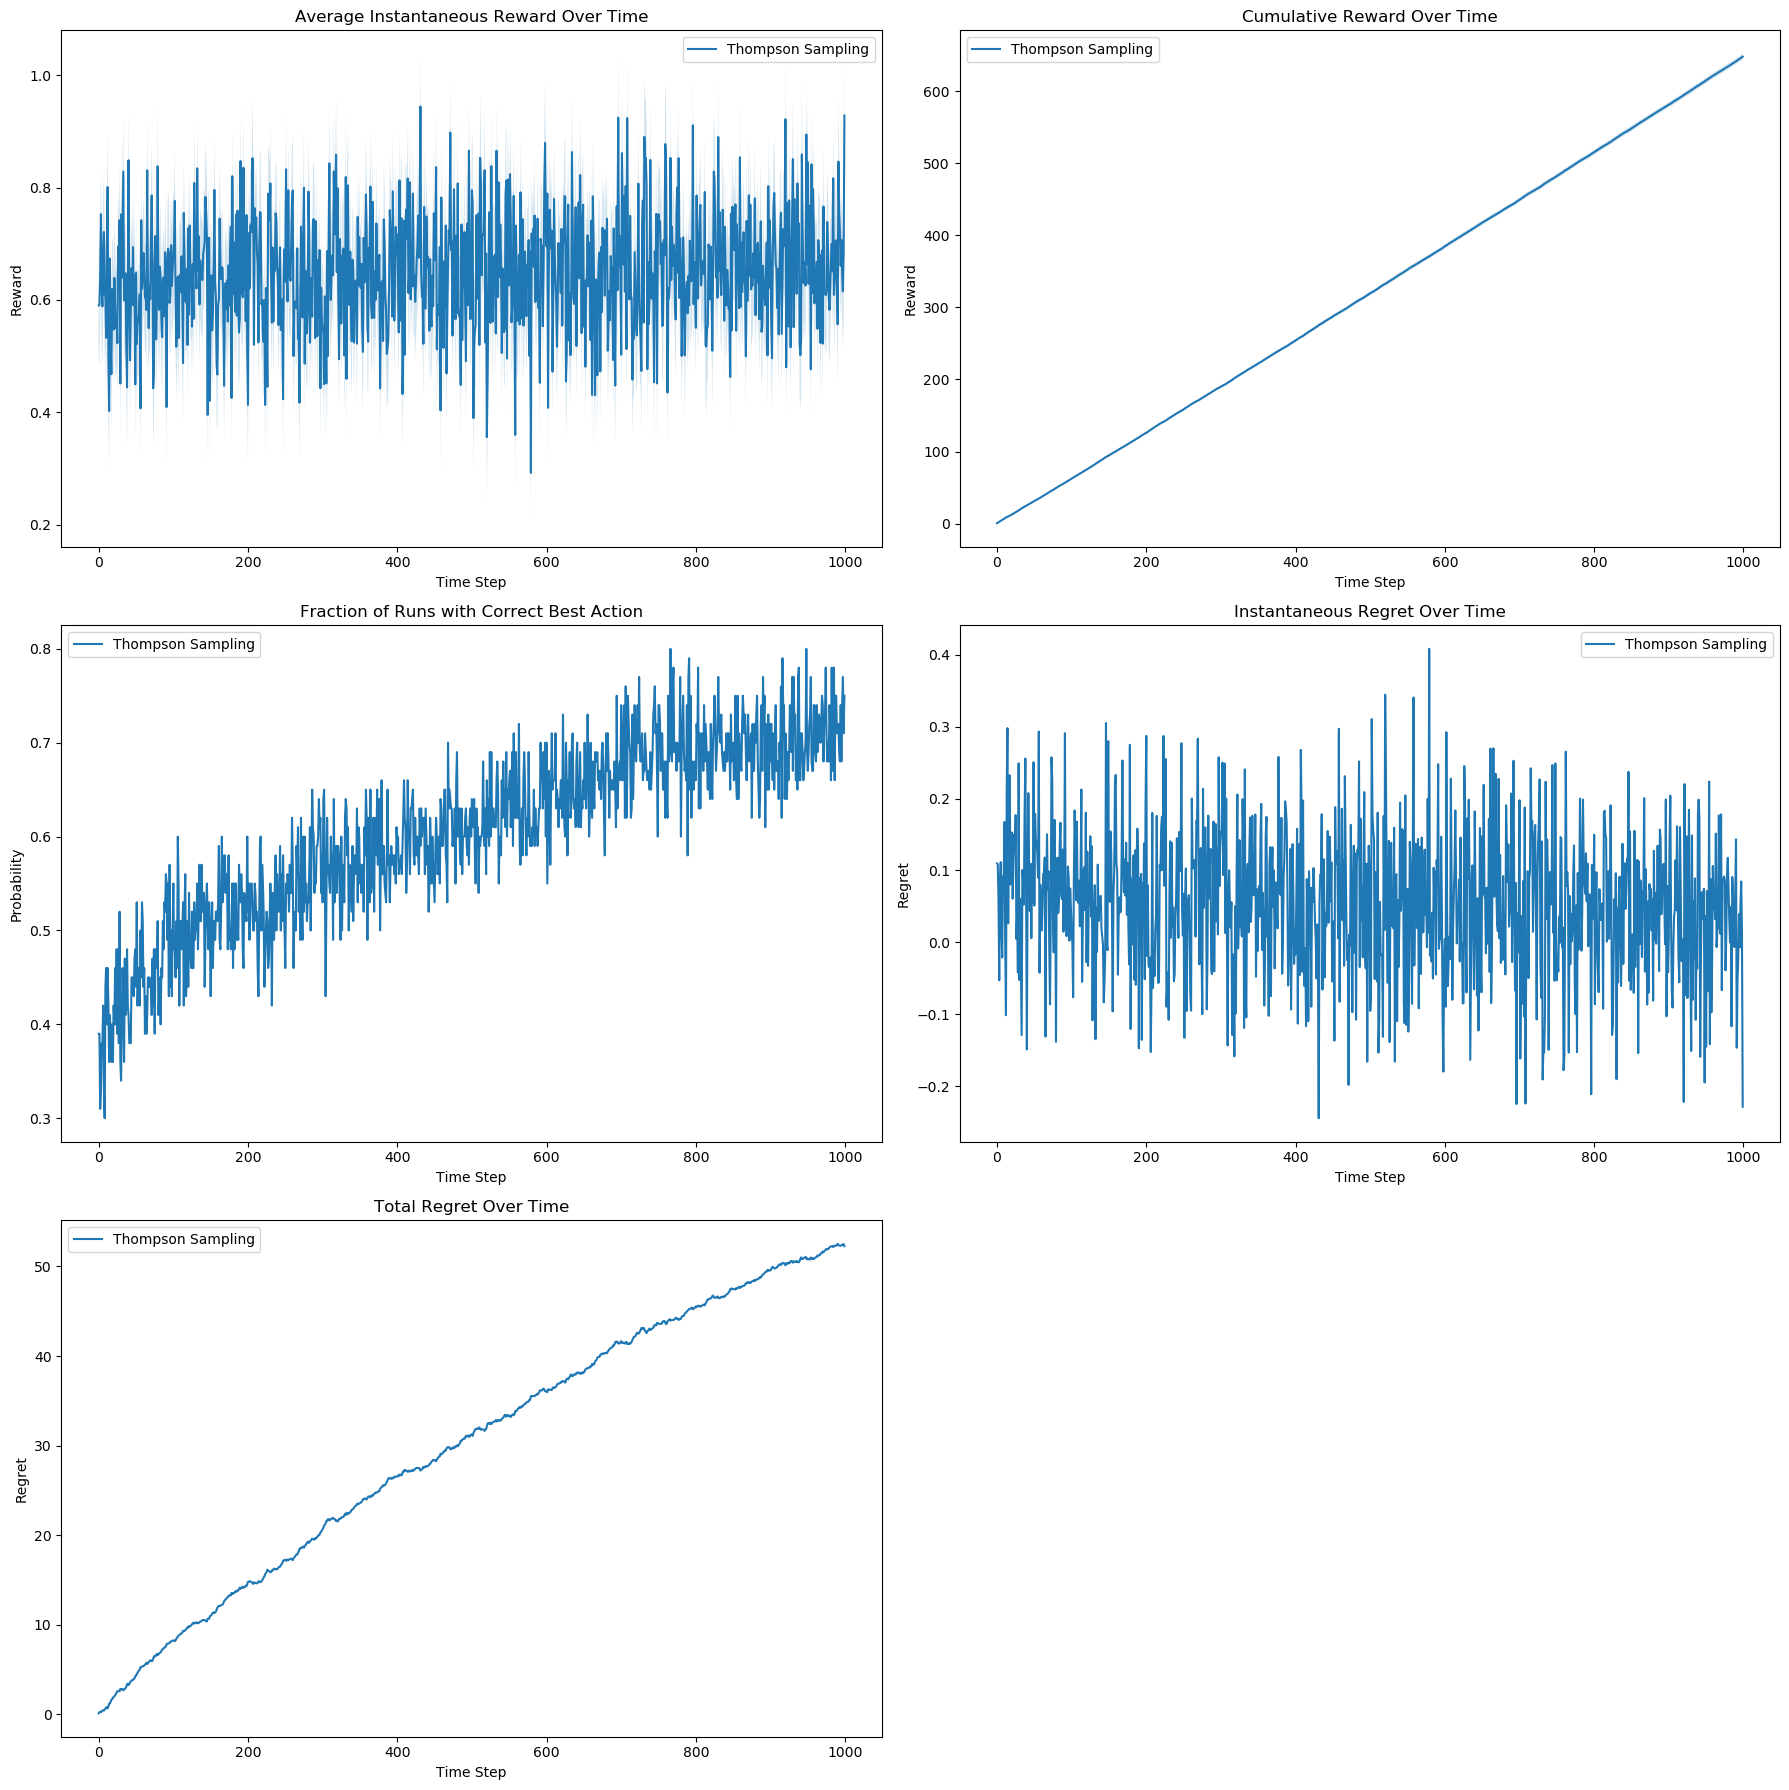

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def thompson_sampling(bandit, num_time_steps=1000):
    """
    Implements standard Thompson Sampling for a multi-armed bandit.

    bandit: The bandit object with `num_arms` and a `sample` method.
    num_time_steps: Number of time steps to run the algorithm.
    """
    num_arms = bandit.num_arms

    # Parameters for Beta distribution (priors)
    alpha_params = np.ones(num_arms)  # Success counts
    beta_params = np.ones(num_arms)   # Failure counts

    # Metrics
    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    total_reward = 0
    total_regret = 0
    best_action = np.argmax(bandit.mean)
    best_action_value = np.max(bandit.mean)

    for t in range(num_time_steps):
        # Sample from Beta distribution to select action
        theta = np.random.beta(alpha_params, beta_params)
        action = np.argmax(theta)

        # Get reward from bandit
        reward = bandit.sample(action)

        # Update Beta distribution
        if reward > 0:
            alpha_params[action] += 1
        else:
            beta_params[action] += 1

        # Update metrics
        R_over_t.append(reward)
        total_reward += reward
        total_R_over_t.append(total_reward)

        # Was our best estimated action actually the true best?
        est_is_best = 1 if action == best_action else 0
        est_is_best_over_t.append(est_is_best)

        # Calculate regret
        instant_regret = best_action_value - reward
        l_over_t.append(instant_regret)
        total_regret += instant_regret
        total_l_over_t.append(total_regret)

    return (R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t)

# Simulated Bandit Class
class GaussianBandit:
    def __init__(self, means, stddev=1.0):
        self.mean = np.array(means)
        self.stddev = stddev
        self.num_arms = len(means)

    def sample(self, action):
        return np.random.normal(self.mean[action], self.stddev)

# Bandit instance
three_arm_gaussian_bandit = GaussianBandit(means=[0.5, 0.6, 0.7])

# Parameters
num_runs = 100
num_time_steps = 1000

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

R_over_t_runs = []
total_R_over_t_runs = []
est_is_best_over_t_runs = []
l_over_t_runs = []
total_l_over_t_runs = []

for run in range(num_runs):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = thompson_sampling(
        three_arm_gaussian_bandit,
        num_time_steps=num_time_steps
    )

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

# Convert to numpy arrays for plotting
R_over_t_runs = np.asarray(R_over_t_runs)
total_R_over_t_runs = np.asarray(total_R_over_t_runs)
est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
l_over_t_runs = np.asarray(l_over_t_runs)
total_l_over_t_runs = np.asarray(total_l_over_t_runs)

# Compute averages and standard errors
mean_R = np.mean(R_over_t_runs, axis=0)
std_err_R = np.std(R_over_t_runs, axis=0) / np.sqrt(num_runs)

mean_total_R = np.mean(total_R_over_t_runs, axis=0)
std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(num_runs)

mean_est_is_best = np.mean(est_is_best_over_t_runs, axis=0)

mean_l = np.mean(l_over_t_runs, axis=0)
mean_total_l = np.mean(total_l_over_t_runs, axis=0)

# 1. Average Instantaneous Reward
axs[0, 0].plot(mean_R, label="Thompson Sampling")
axs[0, 0].fill_between(range(num_time_steps), mean_R - std_err_R, mean_R + std_err_R, alpha=0.2)
axs[0, 0].set_title("Average Instantaneous Reward Over Time")
axs[0, 0].set_xlabel("Time Step")
axs[0, 0].set_ylabel("Reward")
axs[0, 0].legend()

# 2. Average Cumulative Reward
axs[0, 1].plot(mean_total_R, label="Thompson Sampling")
axs[0, 1].fill_between(range(num_time_steps), mean_total_R - std_err_total_R, mean_total_R + std_err_total_R, alpha=0.2)
axs[0, 1].set_title("Cumulative Reward Over Time")
axs[0, 1].set_xlabel("Time Step")
axs[0, 1].set_ylabel("Reward")
axs[0, 1].legend()

# 3. Fraction of Runs That Correctly Identify Best Action
axs[1, 0].plot(mean_est_is_best, label="Thompson Sampling")
axs[1, 0].set_title("Fraction of Runs with Correct Best Action")
axs[1, 0].set_xlabel("Time Step")
axs[1, 0].set_ylabel("Probability")
axs[1, 0].legend()

# 4. Instantaneous Regret
axs[1, 1].plot(mean_l, label="Thompson Sampling")
axs[1, 1].set_title("Instantaneous Regret Over Time")
axs[1, 1].set_xlabel("Time Step")
axs[1, 1].set_ylabel("Regret")
axs[1, 1].legend()

# 5. Total Regret
axs[2, 0].plot(mean_total_l, label="Thompson Sampling")
axs[2, 0].set_title("Total Regret Over Time")
axs[2, 0].set_xlabel("Time Step")
axs[2, 0].set_ylabel("Regret")
axs[2, 0].legend()

# Hide unused subplot
axs[2, 1].axis("off")

plt.tight_layout()
plt.show()


### Answers

Thompson Sampling gradually improves its performance over time. The fraction of correct best actions increases steadily, while regret decreases over time. The instantaneous rewards show variability but trend upwards as Thompson Sampling refines its estimates of the best arm.

## Q8 Comparison of Algorithms

### Graphs

### Answers

## Q9 Non-stationary Environment

### Answers